# Logistic Regression

## Importing the libraries


## Importing The Libraries and The dataset

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('bank-data/bank-full.csv',  sep=';')

In [162]:
print(dataset.shape)

(45211, 17)


In [163]:
print(dataset.head(5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


## Convert Categorical Value to Numerical Values

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in categorical_cols:
    dataset[column] = le.fit_transform(dataset[column])

dataset['y'] = le.fit_transform(dataset['y'])

## Splitting the dataset into the Training set and Test set

In [165]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [166]:
print(X)

[[ 58   4   1 ...  -1   0   3]
 [ 44   9   2 ...  -1   0   3]
 [ 33   2   1 ...  -1   0   3]
 ...
 [ 72   5   1 ... 184   3   2]
 [ 57   1   1 ...  -1   0   3]
 [ 37   2   1 ... 188  11   1]]


In [167]:
print(y)

[0 0 0 ... 1 0 0]


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [169]:
print(X_train)

[[ 39   7   1 ...  -1   0   3]
 [ 31   4   2 ...  -1   0   3]
 [ 36   0   2 ...  -1   0   3]
 ...
 [ 35   4   1 ...  -1   0   3]
 [ 70   5   1 ... 182   1   0]
 [ 46   1   2 ...  -1   0   3]]


In [170]:
print(y_train)

[0 0 0 ... 1 0 0]


In [171]:
print(X_test)

[[37  4  1 ... -1  0  3]
 [36  7  2 ... -1  0  3]
 [47  1  1 ... -1  0  3]
 ...
 [37  6  1 ... -1  0  3]
 [41  4  1 ... -1  0  3]
 [49  4  1 ... -1  0  3]]


In [172]:
print(y_test)

[0 1 0 ... 0 0 1]


## Feature Scaling

In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
print(X_train)

[[-0.18276354  0.8126559  -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 [-0.93754659 -0.10571912  1.36673296 ... -0.41131336 -0.23906547
   0.44528559]
 [-0.46580719 -1.33021913  1.36673296 ... -0.41131336 -0.23906547
   0.44528559]
 ...
 [-0.56015507 -0.10571912 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 [ 2.74202077  0.20040589 -0.27425642 ...  1.41471736  0.1692061
  -2.57889863]
 [ 0.47767162 -1.02409413  1.36673296 ... -0.41131336 -0.23906547
   0.44528559]]


In [175]:
print(X_test)

[[-0.3714593  -0.10571912 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 [-0.46580719  0.8126559   1.36673296 ... -0.41131336 -0.23906547
   0.44528559]
 [ 0.5720195  -1.02409413 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 ...
 [-0.3714593   0.50653089 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 [ 0.00593222 -0.10571912 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]
 [ 0.76071527 -0.10571912 -0.27425642 ... -0.41131336 -0.23906547
   0.44528559]]


## Training the Logistic Regression model on the Training set

In [176]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [177]:
print(classifier.predict(sc.transform([[30, 87000, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])))

[1]


## Predicting the Test set results

In [178]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9756  222]
 [1031  294]]


0.8891444749181633

## Visualising The ROC Curve

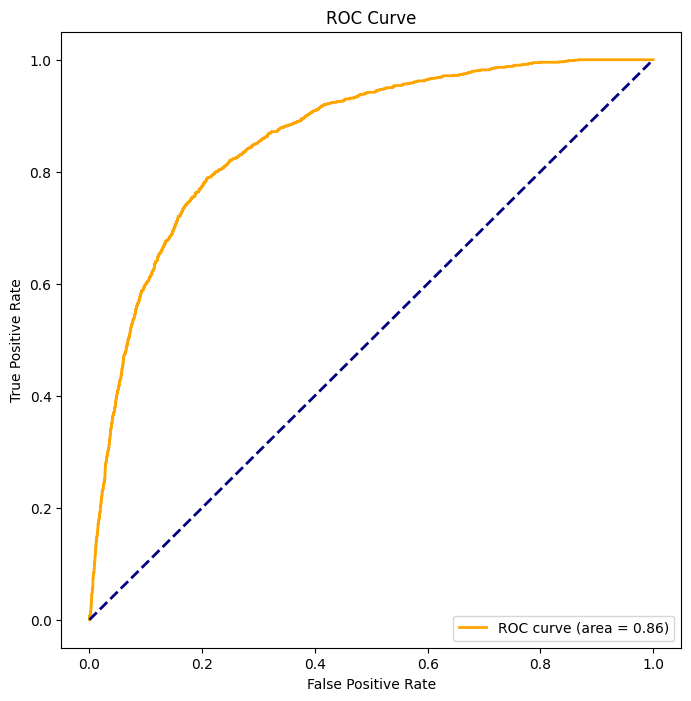

In [180]:
from sklearn.metrics import roc_curve, auc

y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(
    fpr,
    tpr,
    color="orange",
    lw=2,
    label="ROC curve (area = {:.2f})".format(roc_auc),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()